In [4]:
#packages that will be used
import pandas as pd
import plotly.express as px
import country_converter as coco

In [2]:
#importing the dataframe
df = pd.read_csv("NCD_RisC_Lancet_2020_height_child_adolescent_country.csv")
#creating country converter object
cc = coco.CountryConverter()
#adding a new column continent (THIS RUNS VERY VERY SLOW IM SORRY)
df['Continent'] = df['Country'].apply(lambda x: cc.convert(names = x, to = 'continent', not_found = None))
#check if it even runs
df.head()

,Country,Sex,Year,Age group,Mean height,Mean height lower 95% uncertainty interval,Mean height upper 95% uncertainty interval,Mean height standard error,Continent
0,Afghanistan,Boys,1985,5,103.315204,92.912414,113.712811,5.295555,Asia
1,Afghanistan,Boys,1985,6,109.235659,99.914439,118.282644,4.718901,Asia
2,Afghanistan,Boys,1985,7,114.759466,106.310048,123.003367,4.270250,Asia
3,Afghanistan,Boys,1985,8,120.002304,112.202520,127.549987,3.924385,Asia
4,Afghanistan,Boys,1985,9,125.077305,117.880359,132.153791,3.662401,Asia


In [5]:
#filter thru the data to create a new dataframe to hold the rows for adults > 18 and most recent year 2019
adults = df[ (df['Age group'] > 18) & (df['Year'] == 2019) ].reset_index(drop = True)
#drop all columns except continent, country, sex, mean height
adults = adults[['Continent','Country','Sex','Mean height']]
#rename specific column
adults.rename(columns={'Mean height': 'Height'}, inplace=True)
#show df
adults.head()

,Continent,Country,Sex,Height
0,Asia,Afghanistan,Boys,168.495201
1,Europe,Albania,Boys,174.070837
2,Africa,Algeria,Boys,175.040211
3,Oceania,American Samoa,Boys,177.094541
4,Europe,Andorra,Boys,178.842628


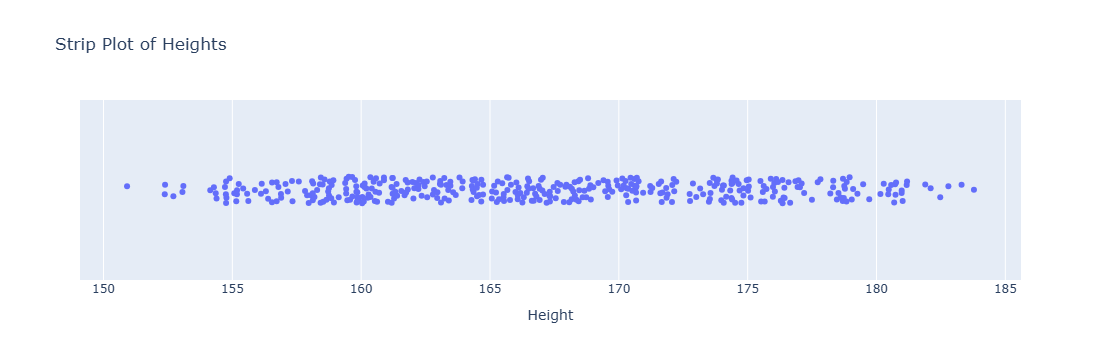

In [16]:
#creating the 1d visualizations
#strip chart
#whole data
px.strip(adults, x="Height", title="Strip Plot of Heights")

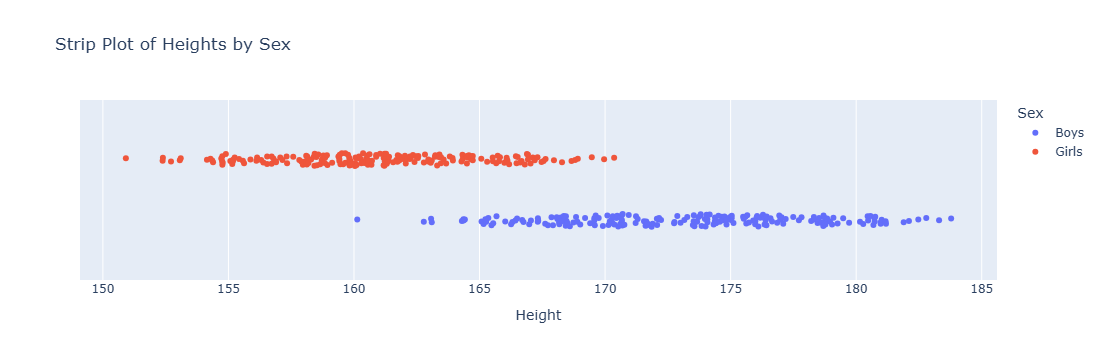

In [17]:
#sex of adult strip chart
px.strip(adults, x="Height", color="Sex", title="Strip Plot of Heights by Sex")

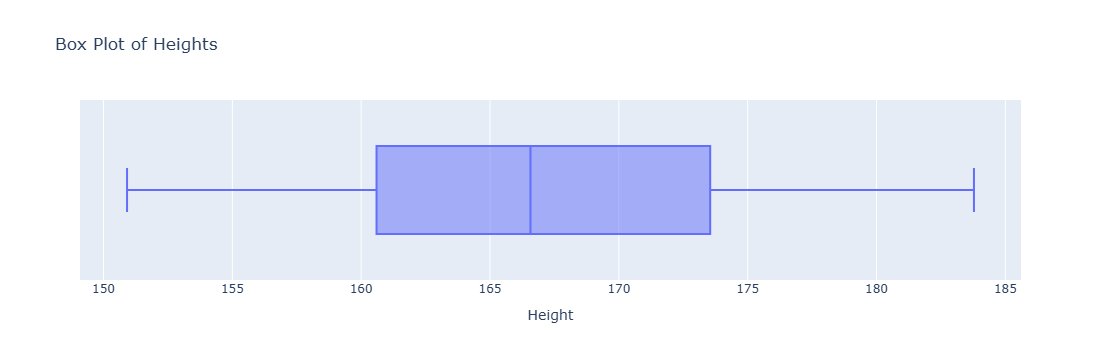

In [18]:
#box chart
#whole data
px.box(adults, x="Height", title="Box Plot of Heights")

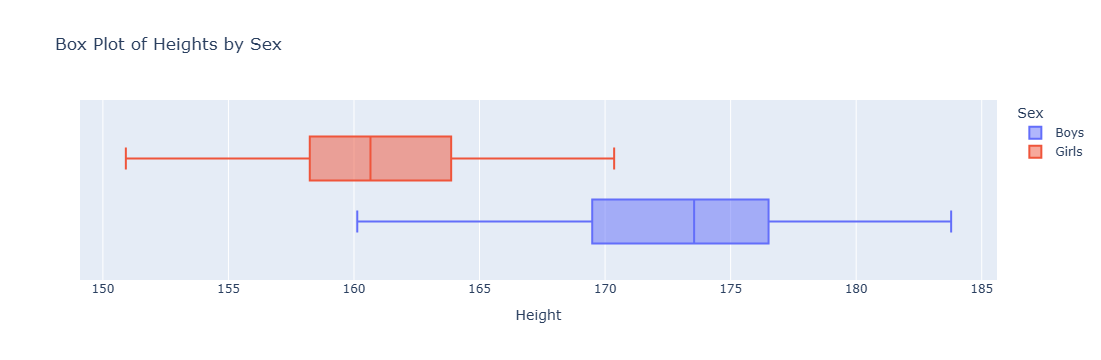

In [19]:
#sex of adult box chart
px.box(adults, x="Height", color="Sex", title="Box Plot of Heights by Sex")

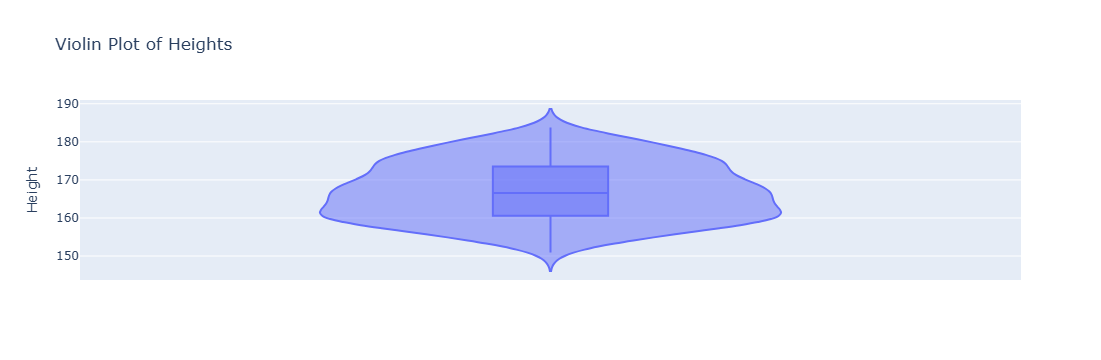

In [21]:
#violin chart
#whole data
px.violin(adults, y="Height", box=True, title="Violin Plot of Heights")

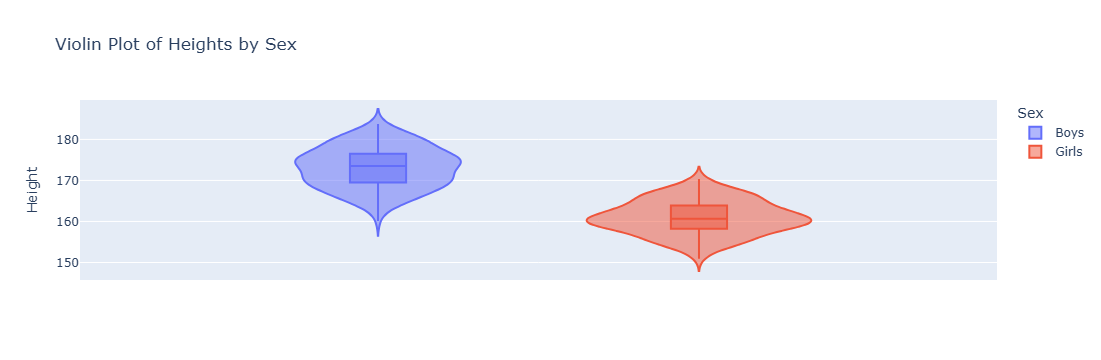

In [13]:
#sex of adult violin chart
px.violin(adults, y="Height", color="Sex", box=True, title="Violin Plot of Heights by Sex")

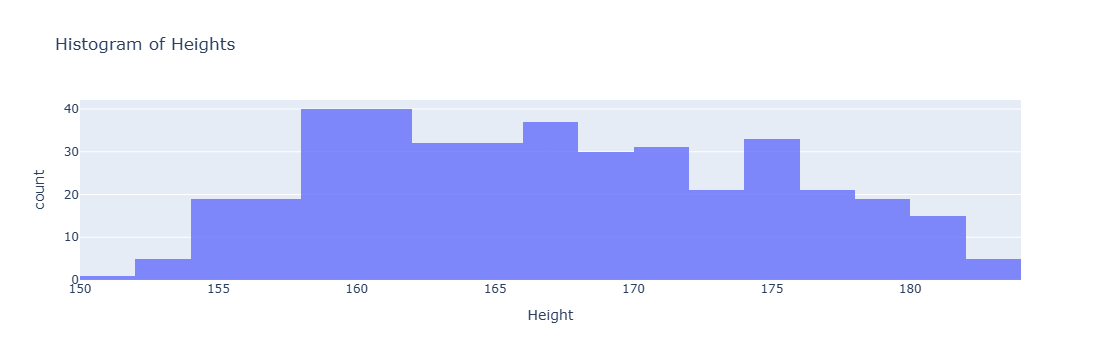

In [31]:
#histogram chart
#whole data
px.histogram(adults, x="Height", nbins=30,opacity = 0.8, barmode="overlay", title="Histogram of Heights")

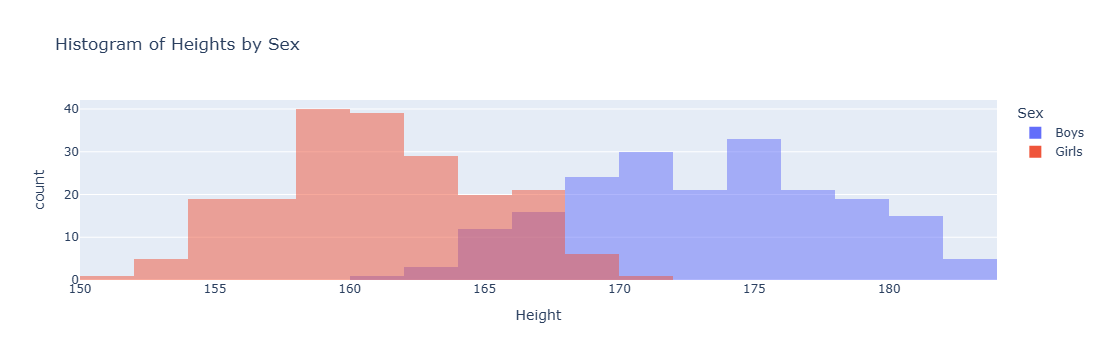

In [29]:
#sex of adult histogram chart
px.histogram(adults, x="Height", color="Sex", barmode= "overlay", nbins=30, title="Histogram of Heights by Sex")